In [3]:
import sys
sys.path.append('../')

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

from tensorflow.python.client import device_lib
print([dev.name for dev in device_lib.list_local_devices()])

['/device:CPU:0', '/device:GPU:0']


2024-01-27 13:47:24.347644: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 13:47:24.404002: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 13:47:24.404053: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 13:47:26.260138: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 13:47:26.260267: I external/local_xla/xla/stream_executor

In [4]:
import keras
import tensorflow as tf
import numpy as np
from lib.encoding import decode_board, encode_board

In [5]:
data = np.memmap('../data/dataset/all_1600.bin', dtype='int64', mode='r').reshape((-1, 3, 12))

2024-01-27 13:47:44.740041: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 13:47:44.740176: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 13:47:44.740217: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 13:47:44.740478: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-01-27 13:47:44.740517: I external/local_xla/xla/stream_executor

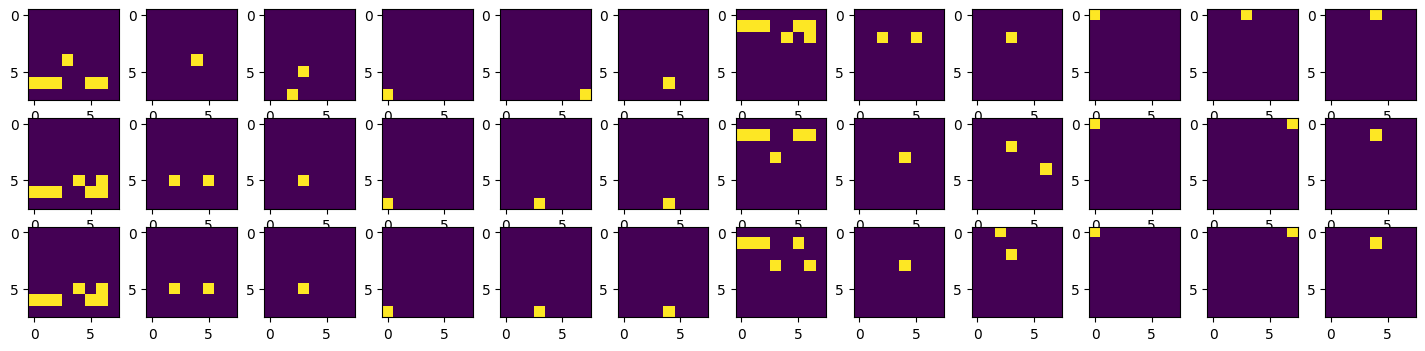

In [6]:
from matplotlib import pyplot as plt

fig, axs = plt.subplots(3, 12, figsize=(18, 4))
for kind in range(3):
    for layer in range(12):
        axs[kind][layer].imshow(decode_board(data[0]).numpy()[kind].reshape((12,8,8))[layer])
plt.show()

In [7]:
chess_model = keras.models.load_model('./checkpoints/1706322336/model-37-43.57.keras')

TypeError: Could not locate function 'custom_loss'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'builtins', 'class_name': 'function', 'config': 'custom_loss', 'registered_name': 'function'}

h2h3 0.026509829


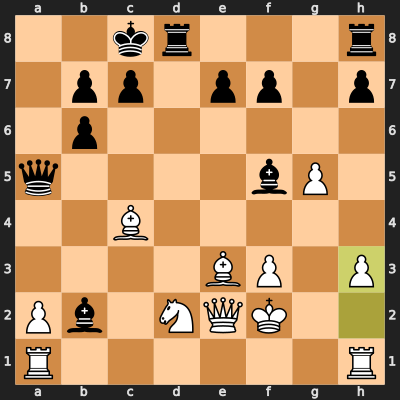

a1e1 0.02335184


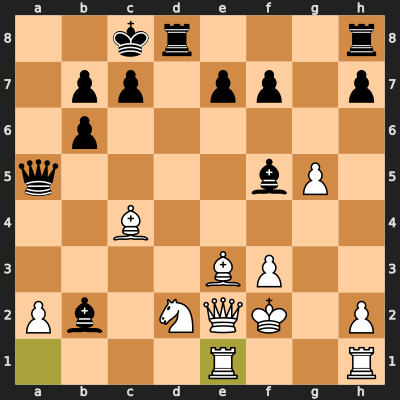

a1b1 0.013330424


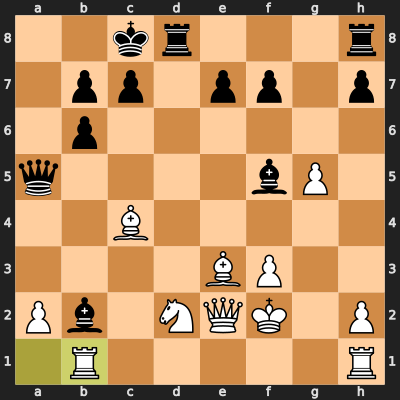

c4d5 0.011274558


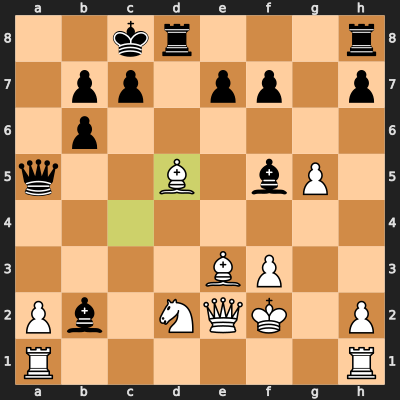

a1f1 0.001566615


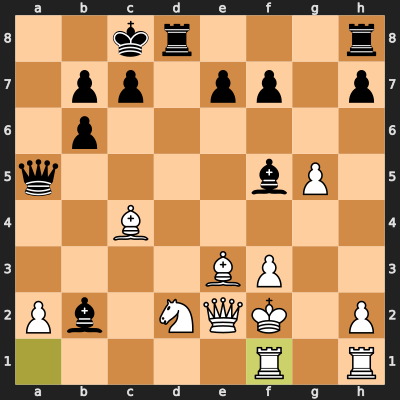

f3f4 -0.008496592


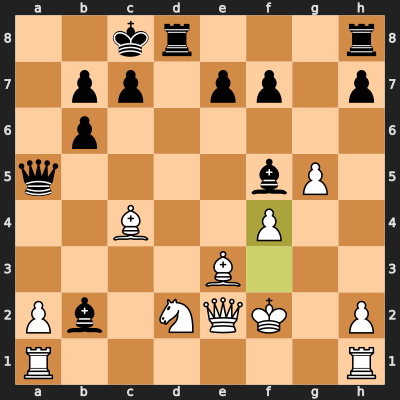

c4b3 -0.008739684


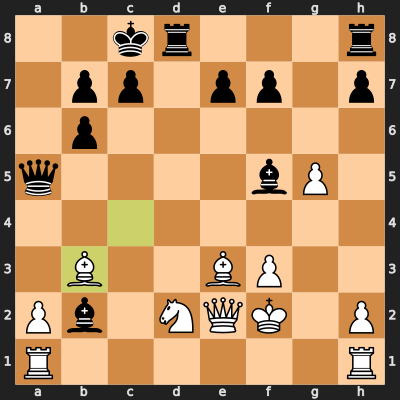

a2a4 -0.009780813


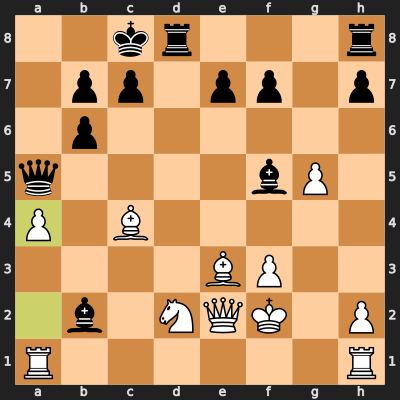

a1c1 -0.010082763


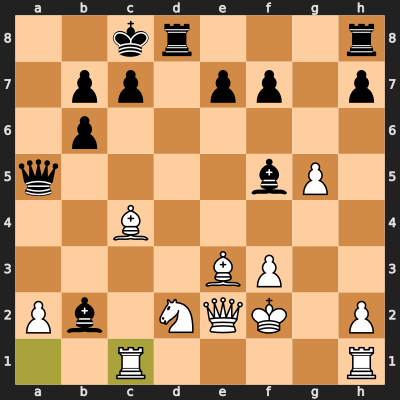

h2h4 -0.011655249


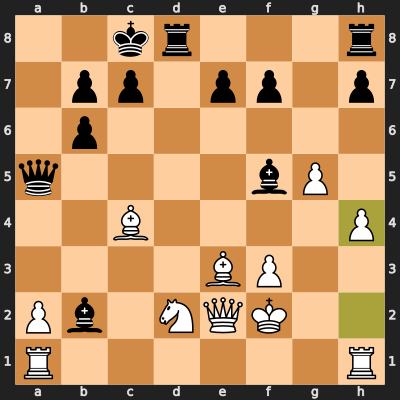

c4d3 -0.012316626


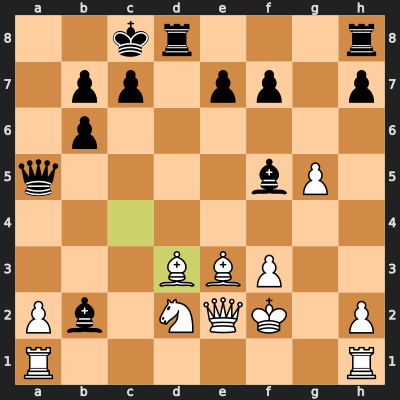

c4e6 -0.012495924


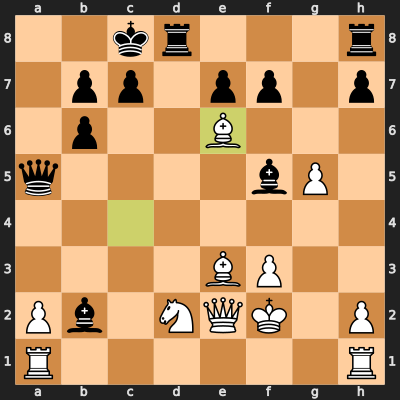

a1d1 -0.01575341


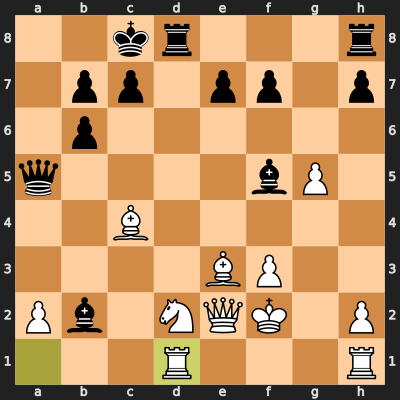

e3c5 -0.015958034


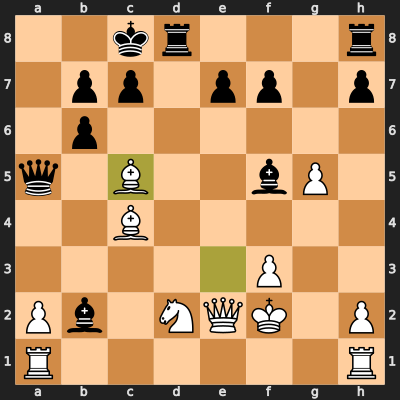

c4a6 -0.017180162


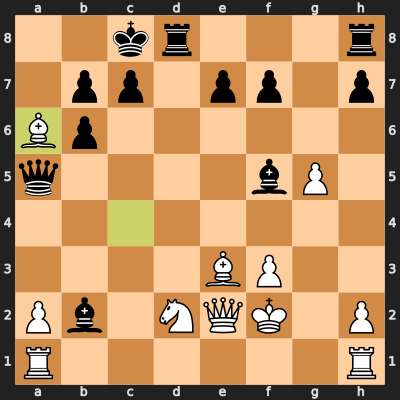

a1g1 -0.021785215


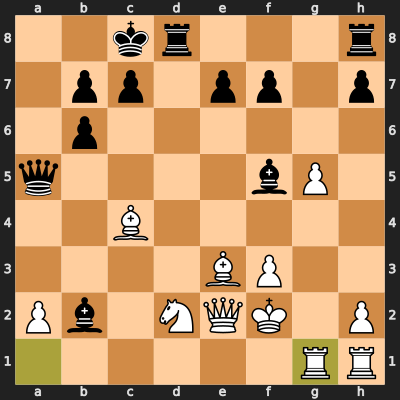

e3d4 -0.022579018


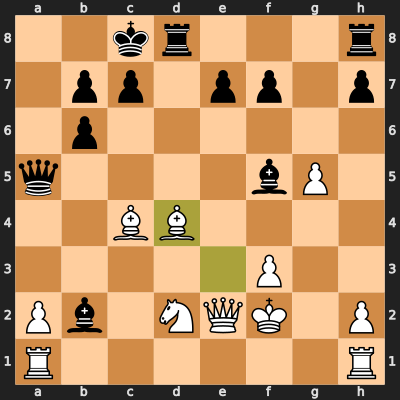

e3b6 -0.024558183


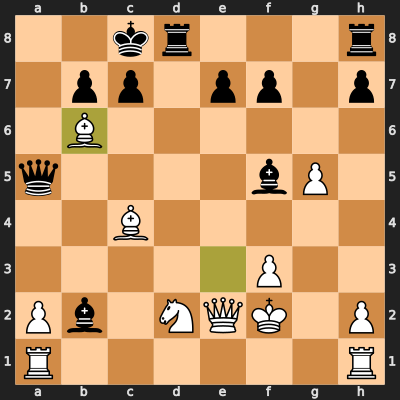

f2g1 -0.027350686


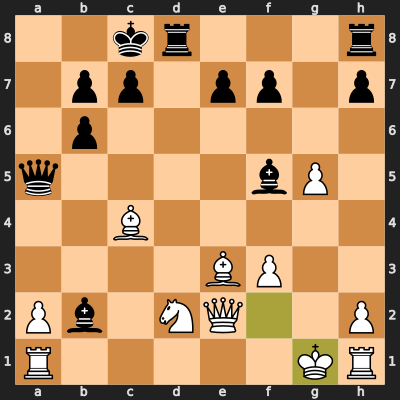

h1e1 -0.02985778


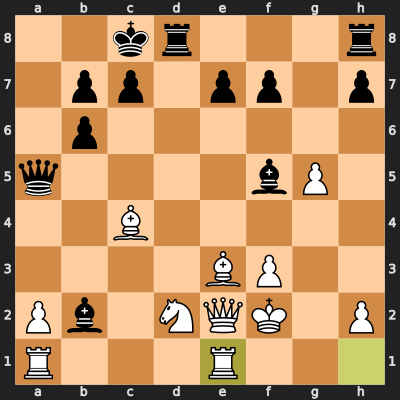

d2e4 -0.030466523


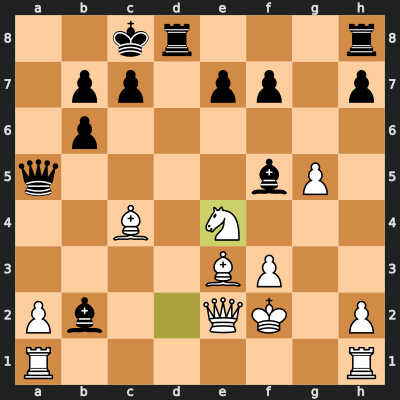

e3f4 -0.030805275


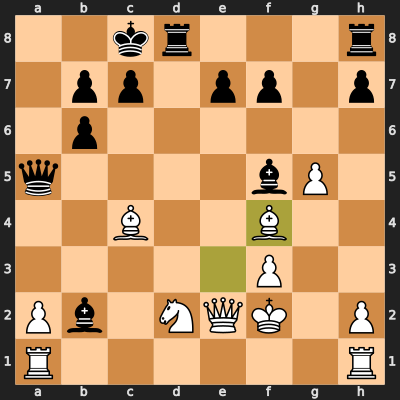

c4b5 -0.034694638


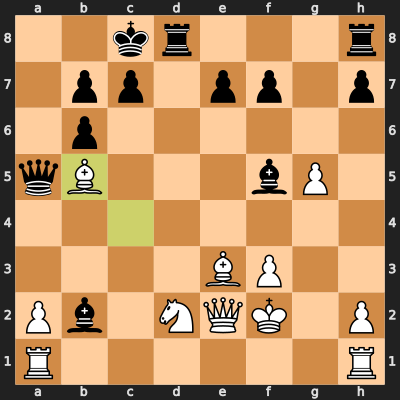

d2f1 -0.035615858


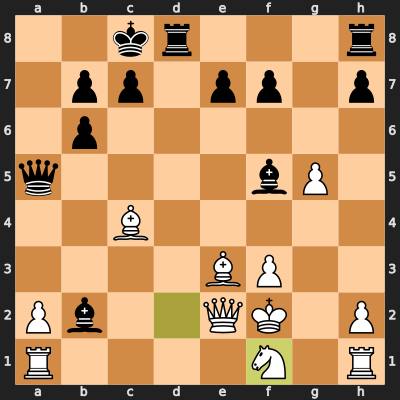

f2g3 -0.036827195


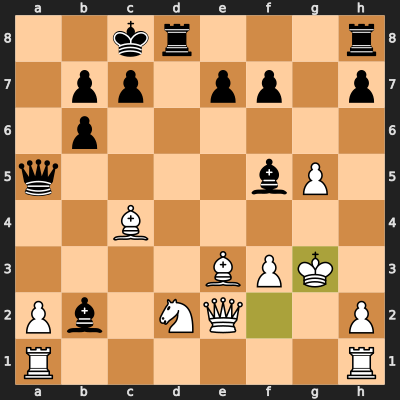

f2g2 -0.041590977


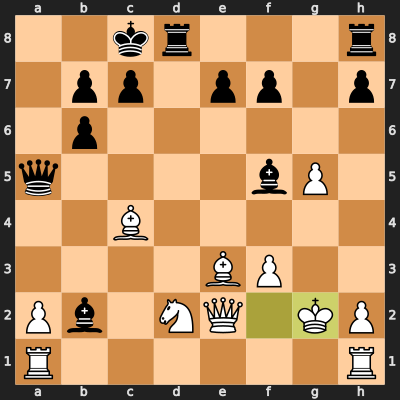

e2e1 -0.04301769


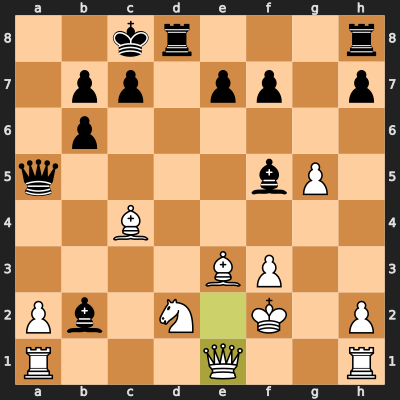

e2d3 -0.04312726


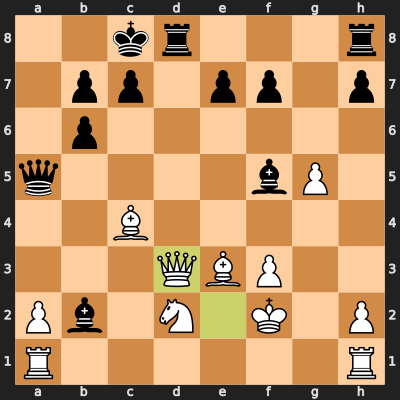

h1f1 -0.044003364


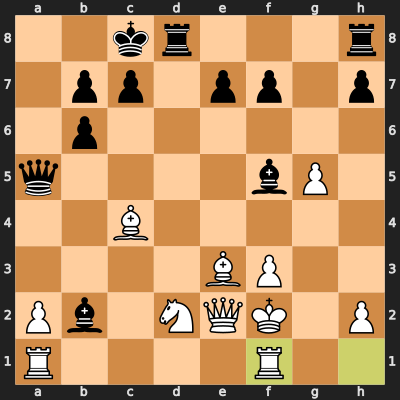

c4f7 -0.04406177


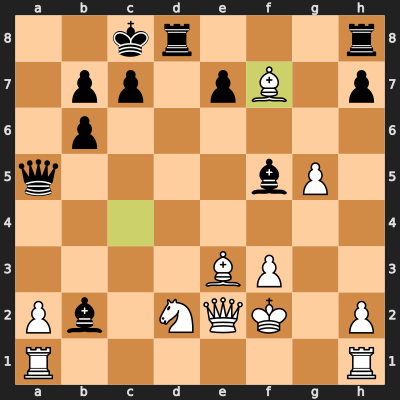

h1b1 -0.04643282


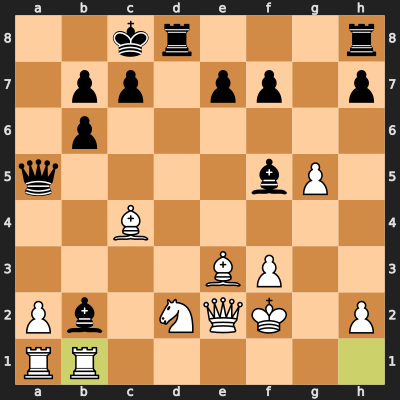

f2e1 -0.048951607


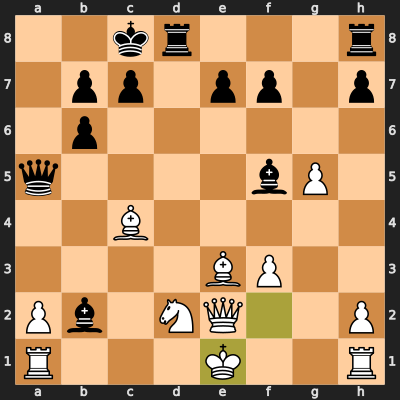

g5g6 -0.050441813


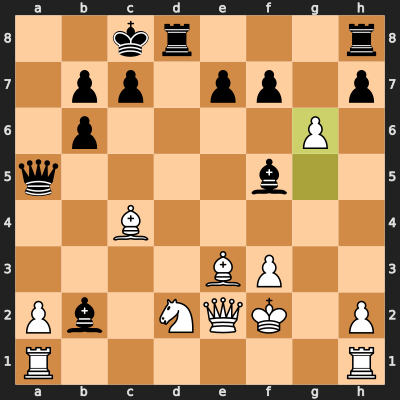

d2b1 -0.052439954


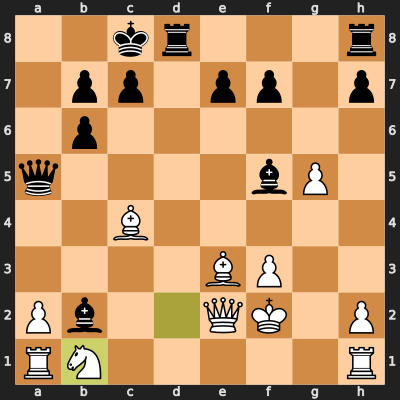

e2f1 -0.05636395


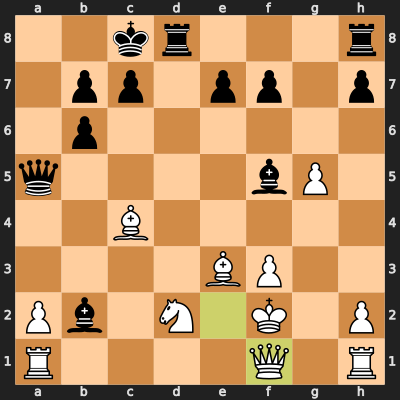

a2a3 -0.056810845


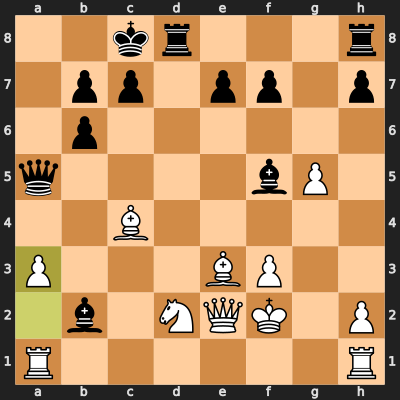

f2f1 -0.060067188


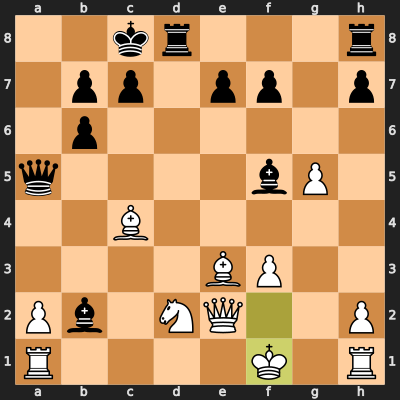

h1g1 -0.06401621


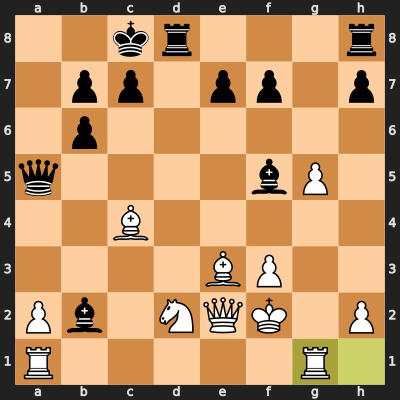

h1d1 -0.06719285


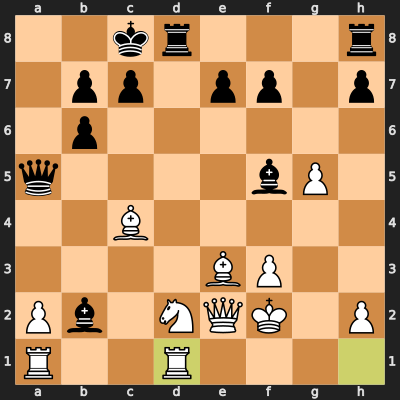

h1c1 -0.06970419


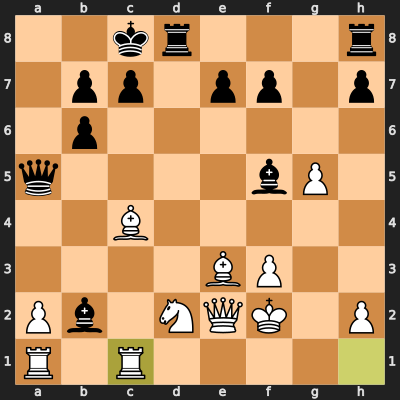

e2d1 -0.077434584


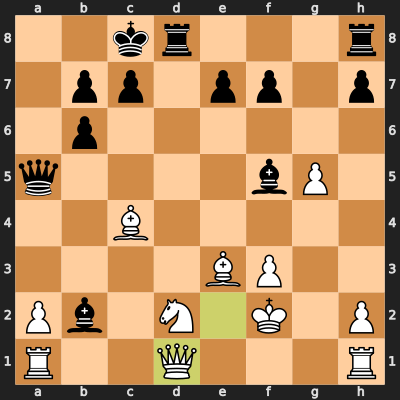

d2b3 -0.08046262


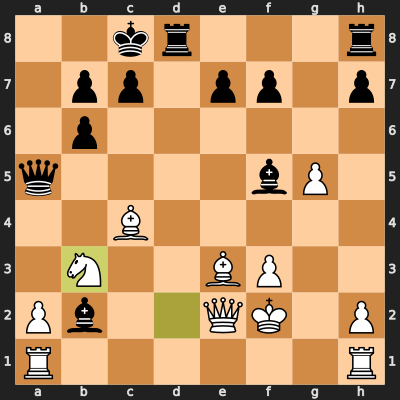

In [5]:
import chess
import chess.svg
from IPython.display import display, Image

board = chess.Board("2kr3r/1pp1pp1p/1p6/q4bP1/2B5/4BP2/Pb1NQK1P/R6R w - - 0 18")
options = []

for move in board.legal_moves:
    board_copy = board.copy()
    board_copy.push(move)
    value = chess_model(encode_board(board_copy)).numpy()[0][0]
    options.append((move, board_copy, value))

options.sort(key=lambda x: x[2], reverse=True)
options

for move, board_copy, value in options:
    print(move, value)
    display(chess.svg.board(board_copy, lastmove=move, size=400))